# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from scipy.fftpack import fft
from scipy import signal

%matplotlib inline

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# There is no missing data
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
sensor.shape  # 1751 rows, 12 columns

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Create a time series index
start = "1/1/2018 00:00:00"
end = "1/1/2018 00:29:10"
timeSerie = pd.date_range(start, end, periods = sensor.shape[0]) #freq = "S")

Assign the time series index to the dataframe's index.

In [7]:
sensor.index = pd.DatetimeIndex(timeSerie, freq='infer')
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

The parameter "freq", should be computed from the Pandas Timeseries, but as we entered frq = "infer", we have to redefine it.

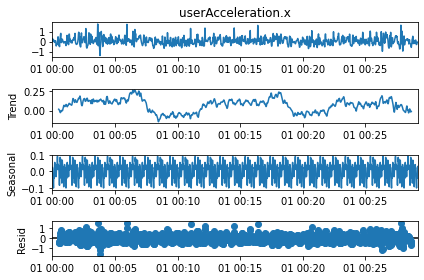

In [8]:
# Plot userAcceleration.x

data = sensor["userAcceleration.x"]
res = sm.tsa.seasonal_decompose(data, period = 60) # Por qué period 60?
res.plot() # Por qué salen dos?
print()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

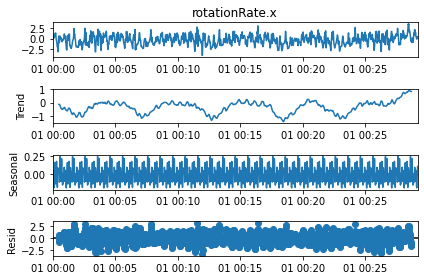

In [9]:
# Plot rotationRate.x

data = sensor["rotationRate.x"]
res = sm.tsa.seasonal_decompose(data, period = 60) # Por qué period 60?

res.plot() # Por qué salen dos?
print()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

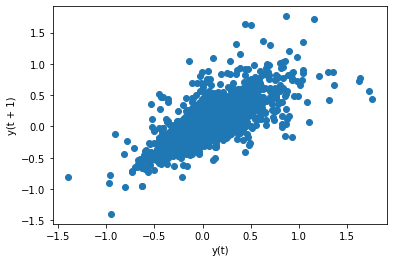

In [10]:
pd.plotting.lag_plot(sensor["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

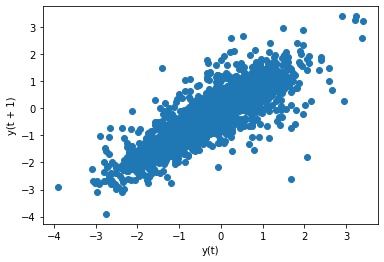

In [11]:
pd.plotting.lag_plot(sensor["rotationRate.x"])

**What are your conclusions from both visualizations?**

Lag plots are used to check if the time Series is random. Random data should not exhibit any structure in the lag plot. However, in this example there is a growing trend in both plots, so indeed there is some autocorrelation, i.e. values at one point depend on past values.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [12]:
# Augmented Dickey Fuller test to userAcceleration.x

X = sensor["userAcceleration.x"]
result = adfuller(X)

print(f"ADF Statistic: {round(result[0],3)}")
print(f"p-value: {result[1]}")

print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {round(value,3)}")

ADF Statistic: -17.958
p-value: 2.823439483037483e-30
Critical Values:
1%: -3.434
5%: -2.863
10%: -2.568


In [13]:
# Augmented Dickey Fuller test to rotationRate.x

X = sensor["rotationRate.x"]
result = adfuller(X)

print(f"ADF Statistic: {round(result[0],3)}")
print(f"p-value: {result[1]}")

print('Critical Values:')
for key, value in result[4].items():
    print(f"{key}: {round(value,3)}")

ADF Statistic: -5.27
p-value: 6.3202303359124956e-06
Critical Values:
1%: -3.434
5%: -2.863
10%: -2.568


**What are your conclusions from this test?**

The Augmented Dickey-Fuller Test is aimed to determine if the time series is stationary.

* Null Hypothesis: there is the presence of a unit root that causes non-stationarity.
* Alternate Hypothesis: There is no unit root. In other words, Stationarity exists.

**Results**: 
* The pvalues < 0.05 in both cases, so we can reject the null hypothesis.
* The ADF statistics are much smaller than the 5% significance level (-17.958 << -2.863 and -5.269 <<-2.863), therefore we can reject the null hypothesis.

**Conclusion**: Both userAcceleration.x and rotationRate.x are stationary, as we can also observe in the plots.

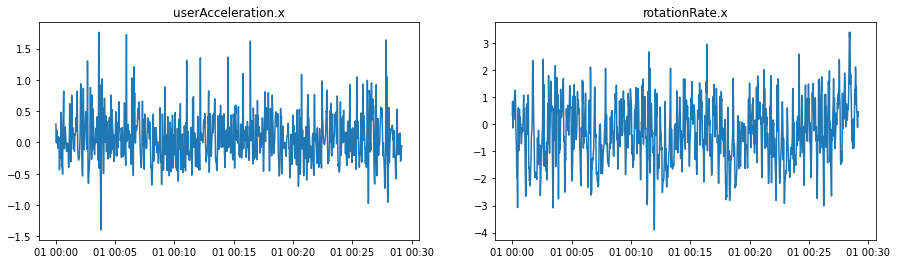

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))
ax1.plot(sensor["userAcceleration.x"])
ax1.set_title('userAcceleration.x')
ax2.plot(sensor["rotationRate.x"])
ax2.set_title('rotationRate.x');

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [15]:
# Separate data into train and test
train = sensor["userAcceleration.x"][0:-10]
test = sensor["userAcceleration.x"][-10:]

# Create and train ARMA model
model = ARMA(train, order=(2,1))
arma_results = model.fit()

# Predict the last 10 values
y_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
print("MSE = ",round(mean_squared_error(test,y_pred),5))
print("RMSE = ",np.sqrt(mean_squared_error(test,y_pred)))

MSE =  0.05076
RMSE =  0.22529863653820809


**Conclusion**: As the userAcceleration.x values are ranged from -1.39 to 1.76, having an RMSE of +-0.22 means having an error of less than 7%, which is a good prediction.

# Bonus
Apply a low pass filter to userAcceleration.x and create an ARMA model.

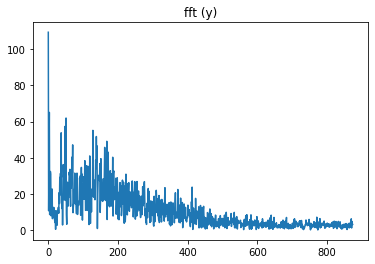

In [34]:
# First transform time domain into frequency domain with fft:
Y = sensor["userAcceleration.x"].values 
fft_y = np.abs(fft(Y))

# Plot the fft
plt.figure()
plt.plot(fft_y[0:int(len(Y)/2)])
plt.title("fft (y)");

In [36]:
# To calculate the cutoff frequency:
# 1. Calculate transfer function
# 2. Plot Bode Diagram
# 3. Usually the cutoff frequency is calculated at 3 dB because at 3 dB the decrease in voltage gain is 
# equivalent to a 50% reduction in the power being fed by the filter.

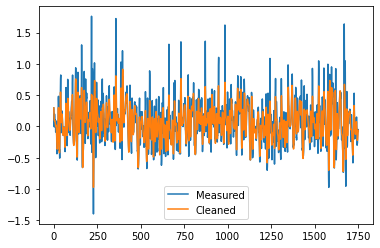

In [63]:
wc = 400 # cutoff frequency
Fm = len(sensor["userAcceleration.x"]) # sample freq
b, a = signal.butter(3, wc/Fm) # filter with an order n=3 and a critical frequency wn=wc/Fm
                               # Numerator (b) and denominator (a) polynomials of the IIR filter
# Apply the filter to the signal
Y_filtered = signal.filtfilt(b, a, Y)

# Plot
plt.plot(Y) # Measured original signal
plt.plot(Y_filtered) # Filtered signal
plt.legend(["Measured","Cleaned"])

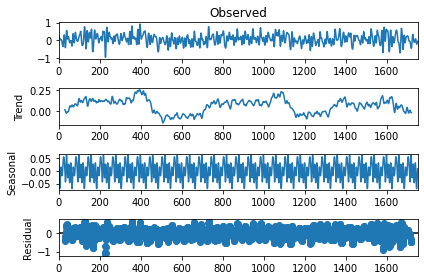

In [64]:
# Check stationarity 
data = Y_filtered
res = sm.tsa.seasonal_decompose(data, period = 60)
res.plot()
print()

Although it may seem that the signal is stationary because of the result of the third graph, it is not stationary due to the trend is changing, so no ARMA can be applied. Instead, we train an AR model:

In [67]:
# Divide data in two sets
train = Y_filtered[0:-10]
test = Y_filtered[-10:]

# Create and train the model
fit_model = AutoReg(train, lags = 4).fit()

# Predict 
y_pred = fit_model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)

# Calculate the error
print("MSE = ",round(mean_squared_error(test,y_pred),5))
print("RMSE = ",np.sqrt(mean_squared_error(test,y_pred)))

MSE =  0.03583
RMSE =  0.18929289374575817


Better than the ARMA for raw data!